## Data Wrangling

In [65]:
import pylab as pl
from itertools import cycle 
import plotly.express as px
import pandas as pd
import plotly.io as pio

pio.renderers.default= 'browser'

In [66]:
cars = pd.read_csv("germany_cars.csv")

In [67]:
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [68]:
cars.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [69]:
cars.dropna(axis=0, inplace=True)

In [70]:
cars.isna().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

In [71]:
cars.shape

(46071, 9)

In [72]:
from datetime import date

In [73]:
todays_date = date.today()

In [74]:
todays_date.year

2022

In [75]:
cars['age'] = todays_date.year - cars["year"]

In [76]:
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,11
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,11
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,11
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,11
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,11


In [77]:
cars.drop(columns=['make', 'year'], inplace=True)

In [78]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46071 entries, 0 to 46404
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46071 non-null  int64  
 1   model      46071 non-null  object 
 2   fuel       46071 non-null  object 
 3   gear       46071 non-null  object 
 4   offerType  46071 non-null  object 
 5   price      46071 non-null  int64  
 6   hp         46071 non-null  float64
 7   age        46071 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.2+ MB


In [79]:
cars.describe()

,mileage,price,hp,age
count,4.607100e+04,4.607100e+04,46071.000000,46071.000000
mean,7.123314e+04,1.656312e+04,132.992663,5.987845
std,6.245413e+04,1.927960e+04,75.074689,3.155555
min,0.000000e+00,1.100000e+03,1.000000,1.000000
25%,1.990000e+04,7.490000e+03,86.000000,3.000000
50%,6.000000e+04,1.100000e+04,116.000000,6.000000
75%,1.050000e+05,1.949000e+04,150.000000,9.000000
max,1.111111e+06,1.199900e+06,850.000000,11.000000


In [80]:
cars.drop(columns=['model', 'fuel'], axis=1, inplace=True)

In [81]:
import numpy as np
np.round(cars.describe(), 2)

,mileage,price,hp,age
count,46071.00,46071.00,46071.00,46071.00
mean,71233.14,16563.12,132.99,5.99
std,62454.13,19279.60,75.07,3.16
min,0.00,1100.00,1.00,1.00
25%,19900.00,7490.00,86.00,3.00
50%,60000.00,11000.00,116.00,6.00
75%,105000.00,19490.00,150.00,9.00
max,1111111.00,1199900.00,850.00,11.00


### Normalizing the data 

In [82]:
from scipy import stats 

cars = cars.dropna()
cars = cars[stats.zscore(cars.price) < 3]
cars = cars[stats.zscore(cars.hp) < 3]
cars = cars[stats.zscore(cars.mileage) < 3]

In [85]:
cars.tail()

,mileage,gear,offerType,price,hp,age
46400,99,Manual,Pre-registered,12990,71.0,1
46401,99,Manual,Pre-registered,12990,71.0,1
46402,99,Manual,Pre-registered,12990,71.0,1
46403,99,Manual,Pre-registered,12990,71.0,1
46404,99,Manual,Pre-registered,12990,71.0,1


### Some Visualizations 

[Text(0.5, 0, 'Mileage'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Relationship between mileage, age and price')]

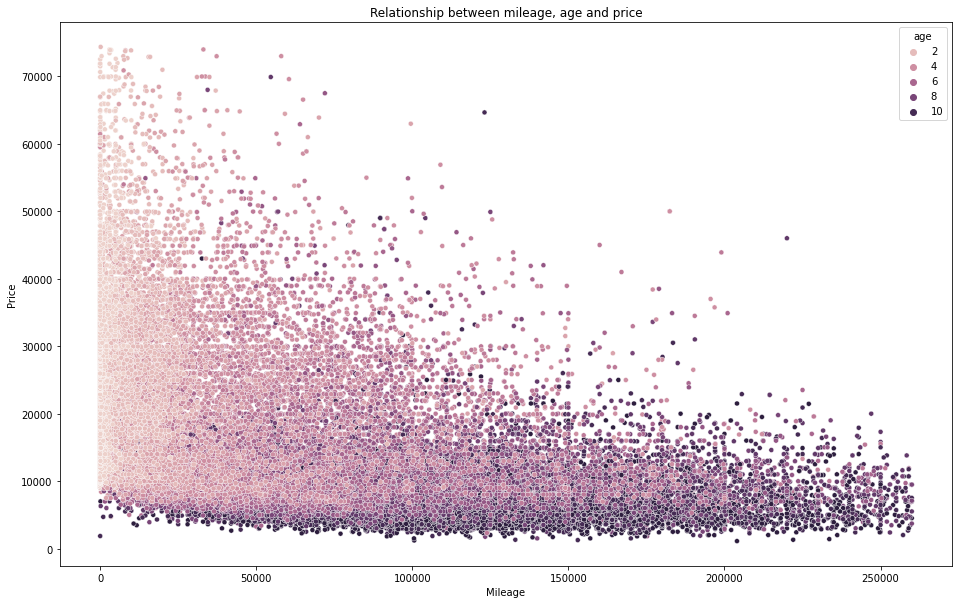

In [86]:
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 


matplotlib.rcParams['figure.figsize'] = (16,10)

fig = sns.scatterplot(y = 'price', x ='mileage', hue = 'age', data =cars, s=25);
fig.set(xlabel = 'Mileage', ylabel = 'Price', title = 'Relationship between mileage, age and price')

In [52]:
cars.head()

,mileage,gear,offerType,price,hp,age
0,235000,Manual,Used,6800,116.0,11
1,92800,Manual,Used,6877,122.0,11
2,149300,Manual,Used,6900,160.0,11
3,96200,Manual,Used,6950,110.0,11
4,156000,Manual,Used,6950,156.0,11


In [87]:
cars_dummies = pd.get_dummies(cars, prefix = '', prefix_sep = '', drop_first=True)

In [88]:
cars_dummies

,mileage,price,hp,age,Manual,Semi-automatic,Employee's car,New,Pre-registered,Used
0,235000,6800,116.0,11,1,0,0,0,0,1
1,92800,6877,122.0,11,1,0,0,0,0,1
2,149300,6900,160.0,11,1,0,0,0,0,1
3,96200,6950,110.0,11,1,0,0,0,0,1
4,156000,6950,156.0,11,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
46400,99,12990,71.0,1,1,0,0,0,1,0
46401,99,12990,71.0,1,1,0,0,0,1,0
46402,99,12990,71.0,1,1,0,0,0,1,0
46403,99,12990,71.0,1,1,0,0,0,1,0


### Boxplot of price vs Age of the car

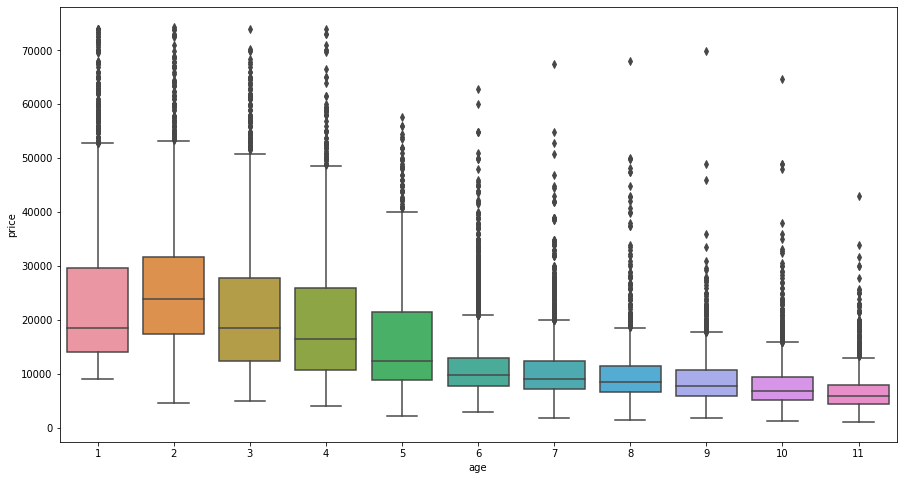

In [89]:
matplotlib.rcParams['figure.figsize'] = (16, 10)
plt.gcf().set_size_inches(15,8)
fig = sns.boxplot(x='age', y = 'price', data = cars_dummies)

### Now we scale the data 

In [90]:
def scalefunc(data):
    length = data.shape
    scaled_df = (data-np.mean(data, axis =0))/np.std(data, axis=0)
    return scaled_df


In [91]:
scaled_cars_dummies = scalefunc(cars_dummies)
scaled_cars_dummies

,mileage,price,hp,age,Manual,Semi-automatic,Employee's car,New,Pre-registered,Used
0,2.882896,-0.742109,-0.140735,1.579813,0.685417,-0.034999,-0.156637,-0.015054,-0.257468,0.393459
1,0.402588,-0.734732,-0.022451,1.579813,0.685417,-0.034999,-0.156637,-0.015054,-0.257468,0.393459
2,1.388083,-0.732529,0.726683,1.579813,0.685417,-0.034999,-0.156637,-0.015054,-0.257468,0.393459
3,0.461892,-0.727739,-0.259019,1.579813,0.685417,-0.034999,-0.156637,-0.015054,-0.257468,0.393459
4,1.504947,-0.727739,0.647827,1.579813,0.685417,-0.034999,-0.156637,-0.015054,-0.257468,0.393459
...,...,...,...,...,...,...,...,...,...,...
46400,-1.214339,-0.149087,-1.027867,-1.594470,0.685417,-0.034999,-0.156637,-0.015054,3.883977,-2.541559
46401,-1.214339,-0.149087,-1.027867,-1.594470,0.685417,-0.034999,-0.156637,-0.015054,3.883977,-2.541559
46402,-1.214339,-0.149087,-1.027867,-1.594470,0.685417,-0.034999,-0.156637,-0.015054,3.883977,-2.541559
46403,-1.214339,-0.149087,-1.027867,-1.594470,0.685417,-0.034999,-0.156637,-0.015054,3.883977,-2.541559


In [92]:
X = scaled_cars_dummies.drop("price", axis = 1).values

In [93]:
X.shape

(44138, 9)

In [95]:
y = scaled_cars_dummies['price'].values.reshape(-1,1)

In [96]:
y.shape

(44138, 1)

### We plot a 3D plot

In [97]:
plt.figure(figsize =(16, 14))
fig = px.scatter_3d(scaled_cars_dummies, x ='mileage', y ='price', z='hp', color ='age', labels = {'class': 'age'})

fig.update_traces(marker=dict(size=13, line=dict(width=1, color ='green')),
                 selector=dict(mode='markers'))

<Figure size 1152x1008 with 0 Axes>

### Principal component analysis 